In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from optics import OPTICS

In [2]:
COLORS = ['plum', 'palevioletred', 'sandybrown', 'lightcoral', 'crimson',
          'mediumaquamarine', 'steelblue', 'slateblue', "cadetblue", 'darkcyan'
          'cornflowerblue', 'seagreen', 'lightsalmon', 'burlywood', 'forestgreen']

                x           y       label
count  300.000000  300.000000  300.000000
mean    18.846500   17.188500    1.943333
std      8.253238    5.855957    0.822015
min      4.700000    3.650000    1.000000
25%     11.287500   13.687500    1.000000
50%     19.100000   16.550000    2.000000
75%     26.250000   19.562500    3.000000
max     33.050000   31.750000    3.000000


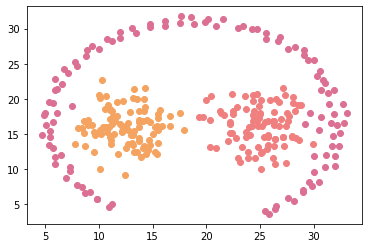

In [3]:
df = pd.read_table("cluster_data_set/pathbased.txt",delim_whitespace=True)
print(df.describe())
fig0 = plt.figure("ground truth")
for i in range(len(df)):
    plt.scatter(df.iloc[i, 0], df.iloc[i, 1],color=COLORS[df.iloc[i, 2] % len(COLORS)])

(0.0, 5.0)

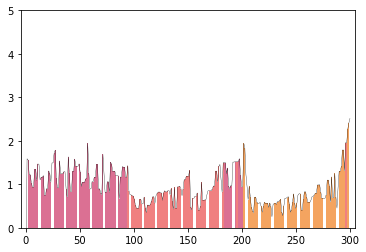

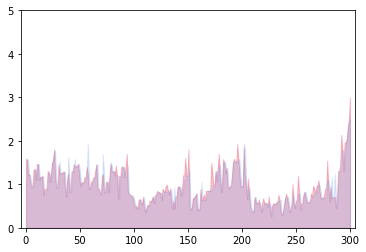

In [26]:
# remove label for clustering task.
df1 = df.iloc[:, :2]
# run optics cluster.
model = OPTICS(df1)
model.optics(Eps=10000, MinPts=2)
# show ordered reachable distance and core distance.
fig1 = plt.figure("ordered rd with ground truth label")
index = np.linspace(0, model.len, model.len)
rd = []
cd = []
labels = []
for i in range(model.len):
    rd.append(model.reachable_distances[model.result_queue[i]])
    cd.append(model.core_distances[model.result_queue[i]])
    labels.append(COLORS[df.iloc[model.result_queue[i], 2] % len(COLORS)])
plt.bar(index, rd, color=labels)
plt.plot(index, rd, color='black', linewidth=0.3)
plt.ylim(0, 5)
plt.xlim(-5, model.len+5)
fig2 = plt.figure("ordered rd and cd")
plt.fill_between(index, 0, cd, alpha=0.25, color='crimson')
plt.fill_between(index, 0, rd, alpha=0.2, color='cornflowerblue')
plt.xlim(-5, model.len+5)
plt.ylim(0, 5)

(0.0, 5.0)

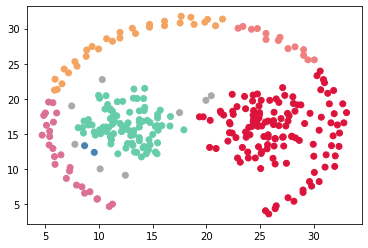

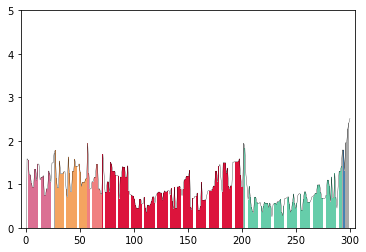

In [33]:
# extract cluster result and visualize
model.cluster_extract(1.69)
fig3 = plt.figure("clustering result")
cluster_labels = []
for i in range(model.len):
    c = model.cluster_labels[i]
    if c == -1:
        cluster_labels.append("darkgrey")
    else:
        cluster_labels.append(COLORS[c % len(COLORS)])
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], color=cluster_labels)

fig4 = plt.figure("rd with clustering labels")
plt.bar(index, rd, color=[cluster_labels[i] for i in model.result_queue])
plt.plot(index, rd, color='black', linewidth=0.3)
plt.xlim(-5, model.len + 5)
plt.ylim(0, 5)